In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
df_CERN = pd.read_csv('df_CERN.csv')
df_scores = pd.read_csv('df_scores.csv')


In [17]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████| 1/1 [00:21<00:00, 21.92s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [18]:
data_path = '/vols/cms/mm1221/Data/2pi/test/raw/test.root'
data_file = uproot.open(data_path)

Track_ind = data_file['tracksters;1']['vertices_indexes'].array()
GT_ind = data_file['simtrackstersCP;1']['vertices_indexes'].array()
GT_bc = data_file['simtrackstersCP;1']['barycenter_x'].array()
energies = data_file['clusters;2']['energy'].array()
LC_x = data_file['clusters;2']['position_x'].array()
LC_y = data_file['clusters;2']['position_y'].array()
LC_z = data_file['clusters;2']['position_z'].array()
LC_eta = data_file['clusters;2']['position_eta'].array()
MT_ind = data_file['trackstersMerged;2']['vertices_indexes'].array()

skim_mask = []
for e in GT_bc:
    if len(e) == 2:
        skim_mask.append(True)
    else:
        skim_mask.append(False)
        
GT_ind = GT_ind[skim_mask]
energies = energies[skim_mask]
Track_ind = Track_ind[skim_mask]
MT_ind = MT_ind[skim_mask]

LC_x = LC_x[skim_mask]
LC_y = LC_y[skim_mask]
LC_z = LC_z[skim_mask]
LC_eta = LC_eta[skim_mask]

In [19]:
#0.0005,32,256,5,0.2,12,128
# Initialize model and load state dictionary
from model import Net
model = Net(hidden_dim = 256, num_layers = 5, dropout = 0.2, contrastive_dim = 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/results_lr0.0005_bs32_hd256_nl5_do0.2_k12_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-4): 5 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=256, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [20]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=12)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 289/3530...
Processing event 290/3530...
Processing event 291/3530...
Processing event 292/3530...
Processing event 293/3530...
Processing event 294/3530...
Processing event 295/3530...
Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing eve

Processing event 576/3530...
Processing event 577/3530...
Processing event 578/3530...
Processing event 579/3530...
Processing event 580/3530...
Processing event 581/3530...
Processing event 582/3530...
Processing event 583/3530...
Processing event 584/3530...
Processing event 585/3530...
Processing event 586/3530...
Processing event 587/3530...
Processing event 588/3530...
Processing event 589/3530...
Processing event 590/3530...
Processing event 591/3530...
Processing event 592/3530...
Processing event 593/3530...
Processing event 594/3530...
Processing event 595/3530...
Processing event 596/3530...
Processing event 597/3530...
Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing eve

Processing event 873/3530...
Processing event 874/3530...
Processing event 875/3530...
Processing event 876/3530...
Processing event 877/3530...
Processing event 878/3530...
Processing event 879/3530...
Processing event 880/3530...
Processing event 881/3530...
Processing event 882/3530...
Processing event 883/3530...
Processing event 884/3530...
Processing event 885/3530...
Processing event 886/3530...
Processing event 887/3530...
Processing event 888/3530...
Processing event 889/3530...
Processing event 890/3530...
Processing event 891/3530...
Processing event 892/3530...
Processing event 893/3530...
Processing event 894/3530...
Processing event 895/3530...
Processing event 896/3530...
Processing event 897/3530...
Processing event 898/3530...
Processing event 899/3530...
Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing eve

Processing event 1171/3530...
Processing event 1172/3530...
Processing event 1173/3530...
Processing event 1174/3530...
Processing event 1175/3530...
Processing event 1176/3530...
Processing event 1177/3530...
Processing event 1178/3530...
Processing event 1179/3530...
Processing event 1180/3530...
Processing event 1181/3530...
Processing event 1182/3530...
Processing event 1183/3530...
Processing event 1184/3530...
Processing event 1185/3530...
Processing event 1186/3530...
Processing event 1187/3530...
Processing event 1188/3530...
Processing event 1189/3530...
Processing event 1190/3530...
Processing event 1191/3530...
Processing event 1192/3530...
Processing event 1193/3530...
Processing event 1194/3530...
Processing event 1195/3530...
Processing event 1196/3530...
Processing event 1197/3530...
Processing event 1198/3530...
Processing event 1199/3530...
Processing event 1200/3530...
Processing event 1201/3530...
Processing event 1202/3530...
Processing event 1203/3530...
Processing

Processing event 1468/3530...
Processing event 1469/3530...
Processing event 1470/3530...
Processing event 1471/3530...
Processing event 1472/3530...
Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing event 1477/3530...
Processing event 1478/3530...
Processing event 1479/3530...
Processing event 1480/3530...
Processing event 1481/3530...
Processing event 1482/3530...
Processing event 1483/3530...
Processing event 1484/3530...
Processing event 1485/3530...
Processing event 1486/3530...
Processing event 1487/3530...
Processing event 1488/3530...
Processing event 1489/3530...
Processing event 1490/3530...
Processing event 1491/3530...
Processing event 1492/3530...
Processing event 1493/3530...
Processing event 1494/3530...
Processing event 1495/3530...
Processing event 1496/3530...
Processing event 1497/3530...
Processing event 1498/3530...
Processing event 1499/3530...
Processing event 1500/3530...
Processing

Processing event 1764/3530...
Processing event 1765/3530...
Processing event 1766/3530...
Processing event 1767/3530...
Processing event 1768/3530...
Processing event 1769/3530...
Processing event 1770/3530...
Processing event 1771/3530...
Processing event 1772/3530...
Processing event 1773/3530...
Processing event 1774/3530...
Processing event 1775/3530...
Processing event 1776/3530...
Processing event 1777/3530...
Processing event 1778/3530...
Processing event 1779/3530...
Processing event 1780/3530...
Processing event 1781/3530...
Processing event 1782/3530...
Processing event 1783/3530...
Processing event 1784/3530...
Processing event 1785/3530...
Processing event 1786/3530...
Processing event 1787/3530...
Processing event 1788/3530...
Processing event 1789/3530...
Processing event 1790/3530...
Processing event 1791/3530...
Processing event 1792/3530...
Processing event 1793/3530...
Processing event 1794/3530...
Processing event 1795/3530...
Processing event 1796/3530...
Processing

Processing event 2057/3530...
Processing event 2058/3530...
Processing event 2059/3530...
Processing event 2060/3530...
Processing event 2061/3530...
Processing event 2062/3530...
Processing event 2063/3530...
Processing event 2064/3530...
Processing event 2065/3530...
Processing event 2066/3530...
Processing event 2067/3530...
Processing event 2068/3530...
Processing event 2069/3530...
Processing event 2070/3530...
Processing event 2071/3530...
Processing event 2072/3530...
Processing event 2073/3530...
Processing event 2074/3530...
Processing event 2075/3530...
Processing event 2076/3530...
Processing event 2077/3530...
Processing event 2078/3530...
Processing event 2079/3530...
Processing event 2080/3530...
Processing event 2081/3530...
Processing event 2082/3530...
Processing event 2083/3530...
Processing event 2084/3530...
Processing event 2085/3530...
Processing event 2086/3530...
Processing event 2087/3530...
Processing event 2088/3530...
Processing event 2089/3530...
Processing

Processing event 2337/3530...
Processing event 2338/3530...
Processing event 2339/3530...
Processing event 2340/3530...
Processing event 2341/3530...
Processing event 2342/3530...
Processing event 2343/3530...
Processing event 2344/3530...
Processing event 2345/3530...
Processing event 2346/3530...
Processing event 2347/3530...
Processing event 2348/3530...
Processing event 2349/3530...
Processing event 2350/3530...
Processing event 2351/3530...
Processing event 2352/3530...
Processing event 2353/3530...
Processing event 2354/3530...
Processing event 2355/3530...
Processing event 2356/3530...
Processing event 2357/3530...
Processing event 2358/3530...
Processing event 2359/3530...
Processing event 2360/3530...
Processing event 2361/3530...
Processing event 2362/3530...
Processing event 2363/3530...
Processing event 2364/3530...
Processing event 2365/3530...
Processing event 2366/3530...
Processing event 2367/3530...
Processing event 2368/3530...
Processing event 2369/3530...
Processing

Processing event 2633/3530...
Processing event 2634/3530...
Processing event 2635/3530...
Processing event 2636/3530...
Processing event 2637/3530...
Processing event 2638/3530...
Processing event 2639/3530...
Processing event 2640/3530...
Processing event 2641/3530...
Processing event 2642/3530...
Processing event 2643/3530...
Processing event 2644/3530...
Processing event 2645/3530...
Processing event 2646/3530...
Processing event 2647/3530...
Processing event 2648/3530...
Processing event 2649/3530...
Processing event 2650/3530...
Processing event 2651/3530...
Processing event 2652/3530...
Processing event 2653/3530...
Processing event 2654/3530...
Processing event 2655/3530...
Processing event 2656/3530...
Processing event 2657/3530...
Processing event 2658/3530...
Processing event 2659/3530...
Processing event 2660/3530...
Processing event 2661/3530...
Processing event 2662/3530...
Processing event 2663/3530...
Processing event 2664/3530...
Processing event 2665/3530...
Processing

Processing event 2927/3530...
Processing event 2928/3530...
Processing event 2929/3530...
Processing event 2930/3530...
Processing event 2931/3530...
Processing event 2932/3530...
Processing event 2933/3530...
Processing event 2934/3530...
Processing event 2935/3530...
Processing event 2936/3530...
Processing event 2937/3530...
Processing event 2938/3530...
Processing event 2939/3530...
Processing event 2940/3530...
Processing event 2941/3530...
Processing event 2942/3530...
Processing event 2943/3530...
Processing event 2944/3530...
Processing event 2945/3530...
Processing event 2946/3530...
Processing event 2947/3530...
Processing event 2948/3530...
Processing event 2949/3530...
Processing event 2950/3530...
Processing event 2951/3530...
Processing event 2952/3530...
Processing event 2953/3530...
Processing event 2954/3530...
Processing event 2955/3530...
Processing event 2956/3530...
Processing event 2957/3530...
Processing event 2958/3530...
Processing event 2959/3530...
Processing

Processing event 3206/3530...
Processing event 3207/3530...
Processing event 3208/3530...
Processing event 3209/3530...
Processing event 3210/3530...
Processing event 3211/3530...
Processing event 3212/3530...
Processing event 3213/3530...
Processing event 3214/3530...
Processing event 3215/3530...
Processing event 3216/3530...
Processing event 3217/3530...
Processing event 3218/3530...
Processing event 3219/3530...
Processing event 3220/3530...
Processing event 3221/3530...
Processing event 3222/3530...
Processing event 3223/3530...
Processing event 3224/3530...
Processing event 3225/3530...
Processing event 3226/3530...
Processing event 3227/3530...
Processing event 3228/3530...
Processing event 3229/3530...
Processing event 3230/3530...
Processing event 3231/3530...
Processing event 3232/3530...
Processing event 3233/3530...
Processing event 3234/3530...
Processing event 3235/3530...
Processing event 3236/3530...
Processing event 3237/3530...
Processing event 3238/3530...
Processing

Processing event 3484/3530...
Processing event 3485/3530...
Processing event 3486/3530...
Processing event 3487/3530...
Processing event 3488/3530...
Processing event 3489/3530...
Processing event 3490/3530...
Processing event 3491/3530...
Processing event 3492/3530...
Processing event 3493/3530...
Processing event 3494/3530...
Processing event 3495/3530...
Processing event 3496/3530...
Processing event 3497/3530...
Processing event 3498/3530...
Processing event 3499/3530...
Processing event 3500/3530...
Processing event 3501/3530...
Processing event 3502/3530...
Processing event 3503/3530...
Processing event 3504/3530...
Processing event 3505/3530...
Processing event 3506/3530...
Processing event 3507/3530...
Processing event 3508/3530...
Processing event 3509/3530...
Processing event 3510/3530...
Processing event 3511/3530...
Processing event 3512/3530...
Processing event 3513/3530...
Processing event 3514/3530...
Processing event 3515/3530...
Processing event 3516/3530...
Processing

/tmp/ipykernel_1490514/3237170132.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 350/3530...
Processing event 351/3530...
Processing event 352/3530...
Processing event 353/3530...
Processing event 354/3530...
Processing event 355/3530...
Processing event 356/3530...
Processing event 357/3530...
Processing event 358/3530...
Processing event 359/3530...
Processing event 360/3530...
Processing event 361/3530...
Processing event 362/3530...
Processing event 363/3530...
Processing event 364/3530...
Processing event 365/3530...
Processing event 366/3530...
Processing event 367/3530...
Processing event 368/3530...
Processing event 369/3530...
Processing event 370/3530...
Processing event 371/3530...
Processing event 372/3530...
Processing event 373/3530...
Processing event 374/3530...
Processing event 375/3530...
Processing event 376/3530...
Processing event 377/3530...
Processing event 378/3530...
Processing event 379/3530...
Processing event 380/3530...
Processing event 381/3530...
Processing event 382/3530...
Processing event 383/3530...
Processing eve

Processing event 737/3530...
Processing event 738/3530...
Processing event 739/3530...
Processing event 740/3530...
Processing event 741/3530...
Processing event 742/3530...
Processing event 743/3530...
Processing event 744/3530...
Processing event 745/3530...
Processing event 746/3530...
Processing event 747/3530...
Processing event 748/3530...
Processing event 749/3530...
Processing event 750/3530...
Processing event 751/3530...
Processing event 752/3530...
Processing event 753/3530...
Processing event 754/3530...
Processing event 755/3530...
Processing event 756/3530...
Processing event 757/3530...
Processing event 758/3530...
Processing event 759/3530...
Processing event 760/3530...
Processing event 761/3530...
Processing event 762/3530...
Processing event 763/3530...
Processing event 764/3530...
Processing event 765/3530...
Processing event 766/3530...
Processing event 767/3530...
Processing event 768/3530...
Processing event 769/3530...
Processing event 770/3530...
Processing eve

Processing event 1120/3530...
Processing event 1121/3530...
Processing event 1122/3530...
Processing event 1123/3530...
Processing event 1124/3530...
Processing event 1125/3530...
Processing event 1126/3530...
Processing event 1127/3530...
Processing event 1128/3530...
Processing event 1129/3530...
Processing event 1130/3530...
Processing event 1131/3530...
Processing event 1132/3530...
Processing event 1133/3530...
Processing event 1134/3530...
Processing event 1135/3530...
Processing event 1136/3530...
Processing event 1137/3530...
Processing event 1138/3530...
Processing event 1139/3530...
Processing event 1140/3530...
Processing event 1141/3530...
Processing event 1142/3530...
Processing event 1143/3530...
Processing event 1144/3530...
Processing event 1145/3530...
Processing event 1146/3530...
Processing event 1147/3530...
Processing event 1148/3530...
Processing event 1149/3530...
Processing event 1150/3530...
Processing event 1151/3530...
Processing event 1152/3530...
Processing

Processing event 1507/3530...
Processing event 1508/3530...
Processing event 1509/3530...
Processing event 1510/3530...
Processing event 1511/3530...
Processing event 1512/3530...
Processing event 1513/3530...
Processing event 1514/3530...
Processing event 1515/3530...
Processing event 1516/3530...
Processing event 1517/3530...
Processing event 1518/3530...
Processing event 1519/3530...
Processing event 1520/3530...
Processing event 1521/3530...
Processing event 1522/3530...
Processing event 1523/3530...
Processing event 1524/3530...
Processing event 1525/3530...
Processing event 1526/3530...
Processing event 1527/3530...
Processing event 1528/3530...
Processing event 1529/3530...
Processing event 1530/3530...
Processing event 1531/3530...
Processing event 1532/3530...
Processing event 1533/3530...
Processing event 1534/3530...
Processing event 1535/3530...
Processing event 1536/3530...
Processing event 1537/3530...
Processing event 1538/3530...
Processing event 1539/3530...
Processing

Processing event 1901/3530...
Processing event 1902/3530...
Processing event 1903/3530...
Processing event 1904/3530...
Processing event 1905/3530...
Processing event 1906/3530...
Processing event 1907/3530...
Processing event 1908/3530...
Processing event 1909/3530...
Processing event 1910/3530...
Processing event 1911/3530...
Processing event 1912/3530...
Processing event 1913/3530...
Processing event 1914/3530...
Processing event 1915/3530...
Processing event 1916/3530...
Processing event 1917/3530...
Processing event 1918/3530...
Processing event 1919/3530...
Processing event 1920/3530...
Processing event 1921/3530...
Processing event 1922/3530...
Processing event 1923/3530...
Processing event 1924/3530...
Processing event 1925/3530...
Processing event 1926/3530...
Processing event 1927/3530...
Processing event 1928/3530...
Processing event 1929/3530...
Processing event 1930/3530...
Processing event 1931/3530...
Processing event 1932/3530...
Processing event 1933/3530...
Processing

Processing event 2289/3530...
Processing event 2290/3530...
Processing event 2291/3530...
Processing event 2292/3530...
Processing event 2293/3530...
Processing event 2294/3530...
Processing event 2295/3530...
Processing event 2296/3530...
Processing event 2297/3530...
Processing event 2298/3530...
Processing event 2299/3530...
Processing event 2300/3530...
Processing event 2301/3530...
Processing event 2302/3530...
Processing event 2303/3530...
Processing event 2304/3530...
Processing event 2305/3530...
Processing event 2306/3530...
Processing event 2307/3530...
Processing event 2308/3530...
Processing event 2309/3530...
Processing event 2310/3530...
Processing event 2311/3530...
Processing event 2312/3530...
Processing event 2313/3530...
Processing event 2314/3530...
Processing event 2315/3530...
Processing event 2316/3530...
Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing

Processing event 2674/3530...
Processing event 2675/3530...
Processing event 2676/3530...
Processing event 2677/3530...
Processing event 2678/3530...
Processing event 2679/3530...
Processing event 2680/3530...
Processing event 2681/3530...
Processing event 2682/3530...
Processing event 2683/3530...
Processing event 2684/3530...
Processing event 2685/3530...
Processing event 2686/3530...
Processing event 2687/3530...
Processing event 2688/3530...
Processing event 2689/3530...
Processing event 2690/3530...
Processing event 2691/3530...
Processing event 2692/3530...
Processing event 2693/3530...
Processing event 2694/3530...
Processing event 2695/3530...
Processing event 2696/3530...
Processing event 2697/3530...
Processing event 2698/3530...
Processing event 2699/3530...
Processing event 2700/3530...
Processing event 2701/3530...
Processing event 2702/3530...
Processing event 2703/3530...
Processing event 2704/3530...
Processing event 2705/3530...
Processing event 2706/3530...
Processing

Processing event 3061/3530...
Processing event 3062/3530...
Processing event 3063/3530...
Processing event 3064/3530...
Processing event 3065/3530...
Processing event 3066/3530...
Processing event 3067/3530...
Processing event 3068/3530...
Processing event 3069/3530...
Processing event 3070/3530...
Processing event 3071/3530...
Processing event 3072/3530...
Processing event 3073/3530...
Processing event 3074/3530...
Processing event 3075/3530...
Processing event 3076/3530...
Processing event 3077/3530...
Processing event 3078/3530...
Processing event 3079/3530...
Processing event 3080/3530...
Processing event 3081/3530...
Processing event 3082/3530...
Processing event 3083/3530...
Processing event 3084/3530...
Processing event 3085/3530...
Processing event 3086/3530...
Processing event 3087/3530...
Processing event 3088/3530...
Processing event 3089/3530...
Processing event 3090/3530...
Processing event 3091/3530...
Processing event 3092/3530...
Processing event 3093/3530...
Processing

Processing event 3448/3530...
Processing event 3449/3530...
Processing event 3450/3530...
Processing event 3451/3530...
Processing event 3452/3530...
Processing event 3453/3530...
Processing event 3454/3530...
Processing event 3455/3530...
Processing event 3456/3530...
Processing event 3457/3530...
Processing event 3458/3530...
Processing event 3459/3530...
Processing event 3460/3530...
Processing event 3461/3530...
Processing event 3462/3530...
Processing event 3463/3530...
Processing event 3464/3530...
Processing event 3465/3530...
Processing event 3466/3530...
Processing event 3467/3530...
Processing event 3468/3530...
Processing event 3469/3530...
Processing event 3470/3530...
Processing event 3471/3530...
Processing event 3472/3530...
Processing event 3473/3530...
Processing event 3474/3530...
Processing event 3475/3530...
Processing event 3476/3530...
Processing event 3477/3530...
Processing event 3478/3530...
Processing event 3479/3530...
Processing event 3480/3530...
Processing

/tmp/ipykernel_1490514/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


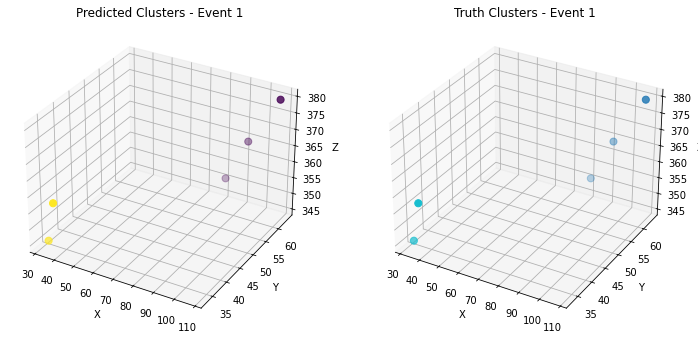

Processing Event 2/3530...


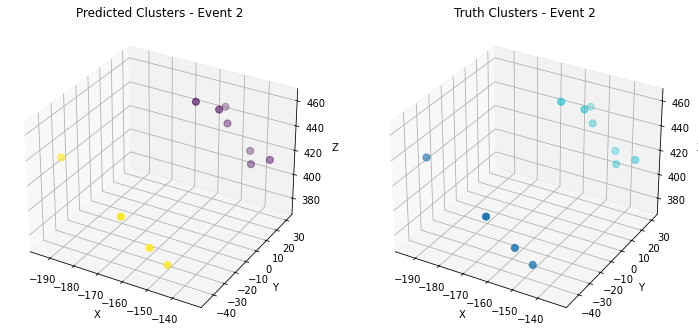

Processing Event 3/3530...


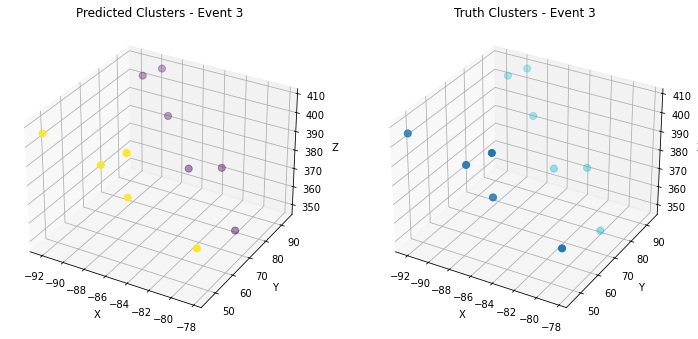

Processing Event 4/3530...


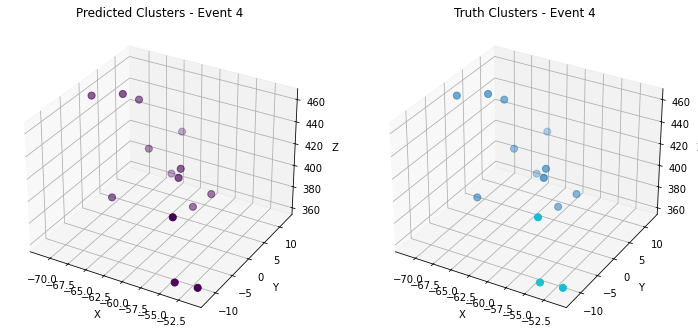

Processing Event 5/3530...


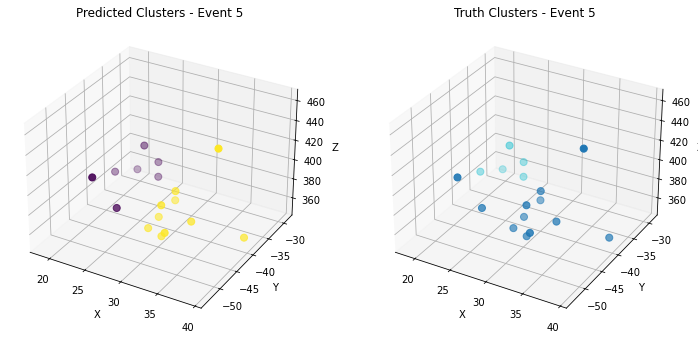

Processing Event 6/3530...


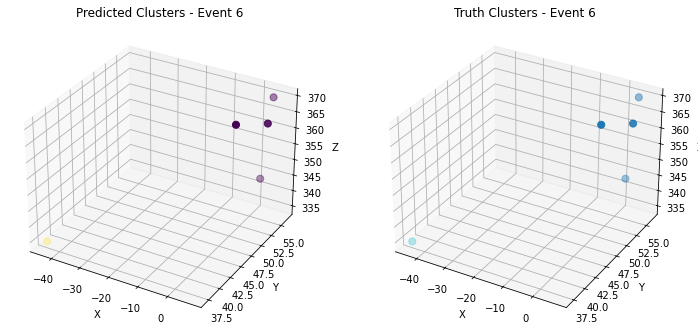

Processing Event 7/3530...


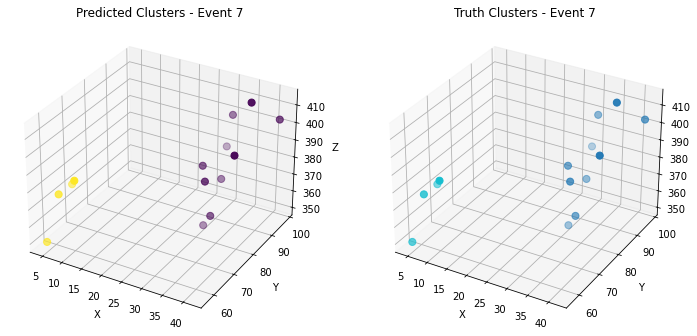

Processing Event 8/3530...


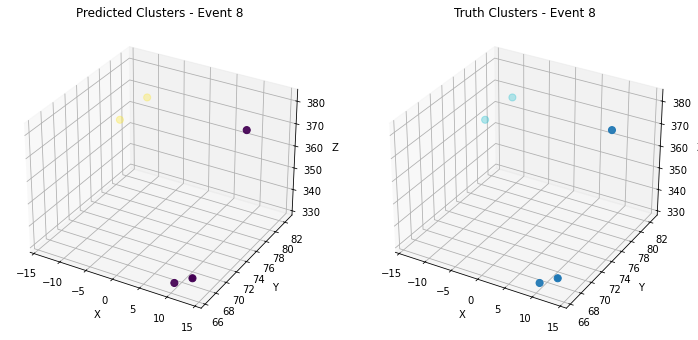

Processing Event 9/3530...


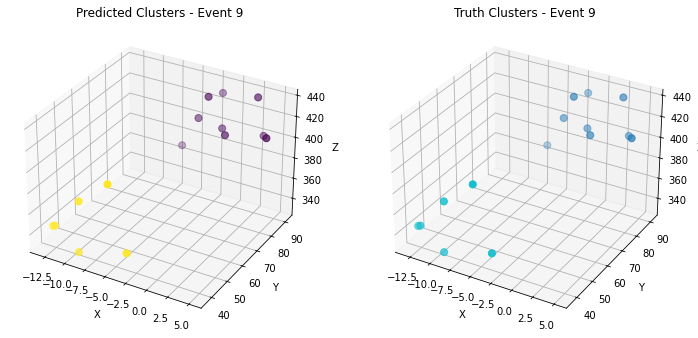

Processing Event 10/3530...


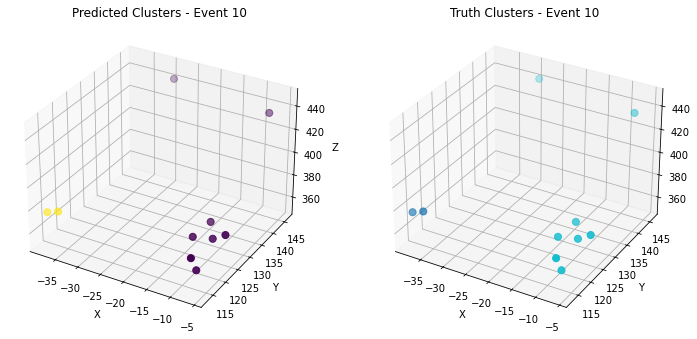

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [4]:
# Initialize recon_ind as an empty list
recon_ind = []

# Loop through each event
for event_idx, labels in enumerate(all_cluster_labels):
    event_clusters = {}  # Dictionary to store clusters for this event
    
    # Loop through each cluster label and corresponding track indices
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    # Append the clusters for this event as a list
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])


NameError: name 'all_cluster_labels' is not defined

In [51]:
def calculate_sim_to_reco_score(CaloParticle, energies_indices, ReconstructedTrackster):
    """
    Calculate the sim-to-reco score for a given CaloParticle and ReconstructedTrackster.
    
    Parameters:
    - CaloParticle: array of DetIds in the CaloParticle.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - ReconstructedTrackster: array of DetIds in the reconstructed Trackster.
    
    Returns:
    - sim_to_reco_score: the calculated sim-to-reco score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)
    if total_energy_caloparticle == 0:
        return 1.0  # No energy in the CaloParticle implies perfect mismatch

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)

    # Iterate over all DetIds in the CaloParticle
    for det_id in CaloParticle:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in CaloParticle

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = energies_indices[det_id] / total_energy_trackster if det_id in ReconstructedTrackster else 0.0

        # Fraction of energy in the CaloParticle (fr_k^SC)
        fr_sc_k = energies_indices[det_id] / total_energy_caloparticle

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_sc_k ** 2                # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_sc_k ** 2) * (energy_k ** 2)

    # Calculate score
    sim_to_reco_score = numerator / denominator if denominator != 0 else 1.0
    return sim_to_reco_score

def calculate_reco_to_sim_score(ReconstructedTrackster, energies_indices, CaloParticle):
    """
    Calculate the reco-to-sim score for a given ReconstructedTrackster and CaloParticle.

    Parameters:
    - ReconstructedTrackster: array of DetIds in the ReconstructedTrackster.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - CaloParticle: array of DetIds in the CaloParticle.

    Returns:
    - reco_to_sim_score: the calculated reco-to-sim score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)
    if total_energy_trackster == 0:
        return 1.0  # No energy in the Trackster implies perfect mismatch

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)

    # Iterate over all DetIds in the ReconstructedTrackster
    for det_id in ReconstructedTrackster:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in the Trackster

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = energies_indices[det_id] / total_energy_trackster

        # Fraction of energy in the CaloParticle (fr_k^MC)
        fr_sc_k = energies_indices[det_id] / total_energy_caloparticle if det_id in CaloParticle else 0.0

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_tst_k ** 2               # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_tst_k ** 2) * (energy_k ** 2)

    # Calculate score
    reco_to_sim_score = numerator / denominator if denominator != 0 else 1.0
    return reco_to_sim_score



In [34]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(30), desc="Processing events"):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event

        # Extract layer cluster positions and eta for this event
        event_x = np.array(LC_x[event_index])
        event_y = np.array(LC_y[event_index])
        event_z = np.array(LC_z[event_index])
        event_eta = np.array(LC_eta[event_index])

        # Compute barycenter for each CaloParticle
        cp_barycenters = []
        cp_avg_etas = []
        for caloparticle in caloparticles:
            # Compute barycenter (x, y, z)
            barycenter_x = np.mean([event_x[det_id] for det_id in caloparticle])
            barycenter_y = np.mean([event_y[det_id] for det_id in caloparticle])
            barycenter_z = np.mean([event_z[det_id] for det_id in caloparticle])
            cp_barycenters.append(np.array([barycenter_x, barycenter_y, barycenter_z]))
            
            # Compute average eta
            avg_eta = np.mean([event_eta[det_id] for det_id in caloparticle])
            cp_avg_etas.append(avg_eta)

        # Compute separation between two CaloParticles if at least two exist
        if len(cp_barycenters) >= 2:
            cp_separation = np.linalg.norm(cp_barycenters[0] - cp_barycenters[1])
        else:
            cp_separation = 0.0

        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                sim_to_reco_score = calculate_sim_to_reco_score(caloparticle, event_energies, trackster)
                # Calculate reco-to-sim score
                reco_to_sim_score = calculate_reco_to_sim_score(trackster, event_energies, caloparticle)

                # Calculate total energy for CaloParticle and Trackster
                cp_energy = np.sum([event_energies[det_id] for det_id in caloparticle])
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy - cp_energy) / cp_energy if cp_energy != 0 else None

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "sim_to_reco_score": sim_to_reco_score,
                    "reco_to_sim_score": reco_to_sim_score,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "cp_avg_eta": cp_avg_etas[calo_idx],
                    "cp_separation": cp_separation,
                    "energy_diff_ratio": energy_diff_ratio
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df


In [54]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(50), desc="Processing events"):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event

        # Extract layer cluster positions and eta for this event
        event_x = np.array(LC_x[event_index])
        event_y = np.array(LC_y[event_index])
        event_z = np.array(LC_z[event_index])
        event_eta = np.array(LC_eta[event_index])

        # Compute barycenter for each CaloParticle
        cp_barycenters = []
        cp_avg_etas = []
        for caloparticle in caloparticles:
            # Compute barycenter (x, y, z)
            barycenter_x = np.mean([event_x[det_id] for det_id in caloparticle])
            barycenter_y = np.mean([event_y[det_id] for det_id in caloparticle])
            barycenter_z = np.mean([event_z[det_id] for det_id in caloparticle])
            cp_barycenters.append(np.array([barycenter_x, barycenter_y, barycenter_z]))
            
            # Compute average eta
            avg_eta = np.mean([event_eta[det_id] for det_id in caloparticle])
            cp_avg_etas.append(avg_eta)

        # Compute separation between two CaloParticles if at least two exist
        if len(cp_barycenters) >= 2:
            cp_separation = np.linalg.norm(cp_barycenters[0] - cp_barycenters[1])
        else:
            cp_separation = 0.0

        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                sim_to_reco_score = calculate_sim_to_reco_score(caloparticle, event_energies, trackster)
                # Calculate reco-to-sim score
                reco_to_sim_score = calculate_reco_to_sim_score(trackster, event_energies, caloparticle)

                # Debugging: Print information when scores exceed 1
                if sim_to_reco_score > 1 or reco_to_sim_score > 1:
                    print(f"Event {event_index}, CP {calo_idx}, Trackster {trackster_idx}:")
                    print(f"Sim-to-Reco Score: {sim_to_reco_score}, Reco-to-Sim Score: {reco_to_sim_score}")
                    print(f"CaloParticle DetIds: {caloparticle}")
                    print(f"Trackster DetIds: {trackster}")
                    print(f"Event Energies (CaloParticle): {[event_energies[det_id] for det_id in caloparticle]}")
                    print(f"Event Energies (Trackster): {[event_energies[det_id] for det_id in trackster]}")
                    print(f"Total Energy (CaloParticle): {np.sum([event_energies[det_id] for det_id in caloparticle])}")
                    print(f"Total Energy (Trackster): {np.sum([event_energies[det_id] for det_id in trackster])}")
                    print(f"Barycenters: {cp_barycenters}")
                    print(f"Separation: {cp_separation}")
                    print(f"Average Eta (CaloParticle): {cp_avg_etas[calo_idx]}")

                # Calculate total energy for CaloParticle and Trackster
                cp_energy = np.sum([event_energies[det_id] for det_id in caloparticle])
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy - cp_energy) / cp_energy if cp_energy != 0 else None

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "sim_to_reco_score": sim_to_reco_score,
                    "reco_to_sim_score": reco_to_sim_score,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "cp_avg_eta": cp_avg_etas[calo_idx],
                    "cp_separation": cp_separation,
                    "energy_diff_ratio": energy_diff_ratio
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df

In [59]:

df_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)
df_CERN = calculate_all_event_scores(GT_ind, energies, MT_ind, LC_x, LC_y, LC_z, LC_eta)

Processing events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.17it/s]


In [5]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_scores['sim_to_reco_score'].max()
max_reco_to_sim_score = df_scores['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Purity + Efficiency

In [6]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.3471 (2449 associated CPs out of 7056 total CPs)
Purity: 0.6909 (4840 associated Tracksters out of 7005 total Tracksters)

Model: CERN Model
Efficiency: 0.3876 (2730 associated CPs out of 7044 total CPs)
Purity: 0.3855 (4844 associated Tracksters out of 12565 total Tracksters)


(       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
 0                0      0             0           1.000000           1.000000   
 1                0      0             1           1.000000           1.000000   
 2                0      0             2           0.129414           0.069215   
 3                0      1             0           0.366915           0.136147   
 4                0      1             1           1.000000           0.910581   
 ...            ...    ...           ...                ...                ...   
 25125         3529      0             1           0.678876           0.201622   
 25126         3529      0             2           1.000000           1.000000   
 25127         3529      1             0           1.000000           0.973164   
 25128         3529      1             1           1.000000           1.000000   
 25129         3529      1             2           0.032259           0.023181   
 
         cp_en

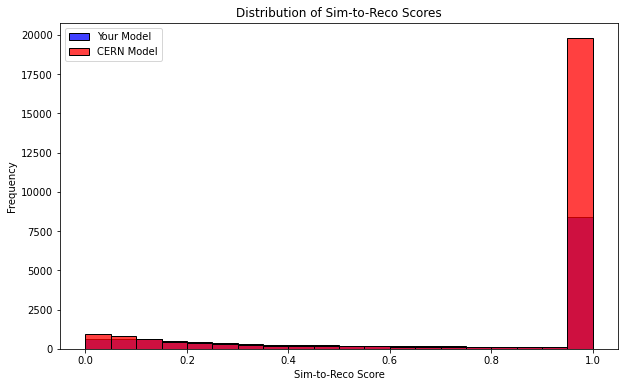

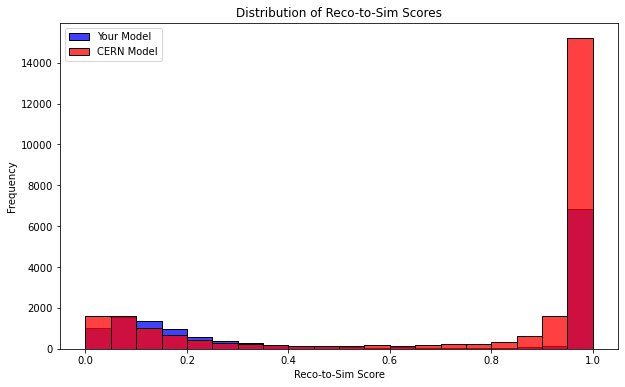

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['sim_to_reco_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['reco_to_sim_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [8]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_CERN['sim_to_reco_score'].max()
max_reco_to_sim_score = df_CERN['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Plot vs params

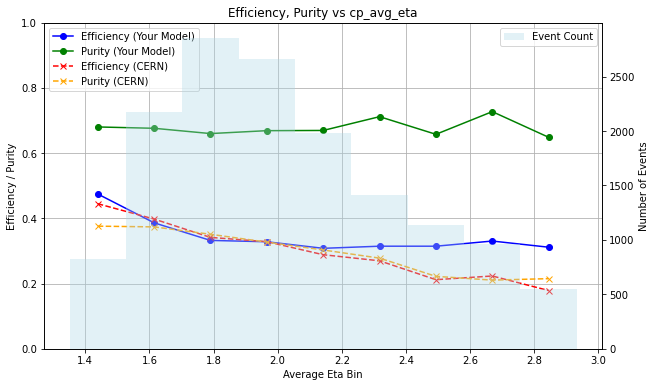

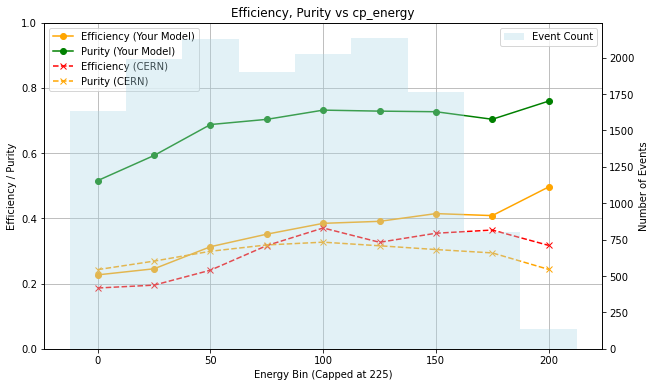

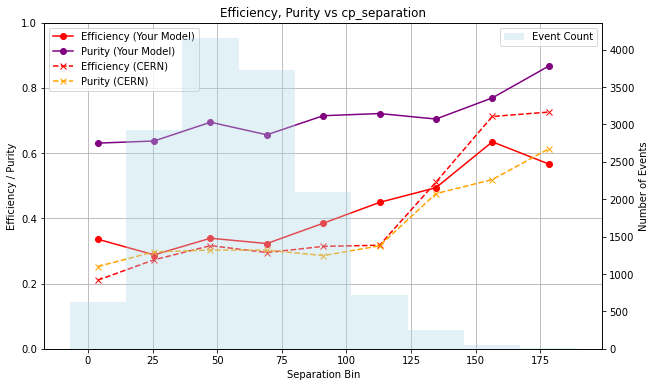

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_energy_diff_vs_separation(df_scores):
    """
    Plot energy difference ratio metrics (mean and sigma) against CaloParticle separation.

    Parameters:
    - df_scores: DataFrame containing the calculated scores and features for events.

    Returns:
    - None (plots are displayed).
    """
    # Filter to include only associated events (reco-to-sim score < 0.2)
    associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

    # Define bins for cp_separation
    separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
    associated_scores['separation_bin'] = pd.cut(
        associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True
    )

    # Initialize lists to store results
    separation_bin_centers = []
    sigma_values = []
    mean_values = []
    event_counts = []

    # Loop through each separation bin
    for bin_idx in range(len(separation_bins) - 1):
        # Select data for the current bin
        bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
        
        # Skip if no data in this bin
        if bin_data.empty:
            continue
        
        # Fit a Gaussian to the data
        mu, sigma = norm.fit(bin_data)
        
        # Store results
        bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
        separation_bin_centers.append(bin_center)
        sigma_values.append(sigma)
        mean_values.append(mu)
        event_counts.append(len(bin_data))

        # Plot example histograms for the first and middle bins
        if bin_idx == 0 or bin_idx == len(separation_bins) // 2:
            plt.figure(figsize=(8, 6))
            plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
            plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
            plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
            plt.ylabel('Density')
            plt.legend()
            plt.grid()
            plt.show()

    # Plot σ (sigma) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
    plt.xlabel('Separation')
    plt.ylabel('Sigma (σ)')
    plt.title('Sigma vs Separation')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot μ (mean) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
    plt.xlabel('Separation')
    plt.ylabel('Mean (μ)')
    plt.title('Mean vs Separation')
    plt.grid()
    plt.legend()
    plt.show()




/tmp/ipykernel_1503488/3855021492.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


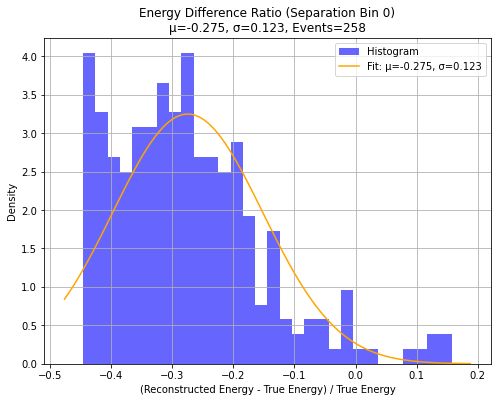

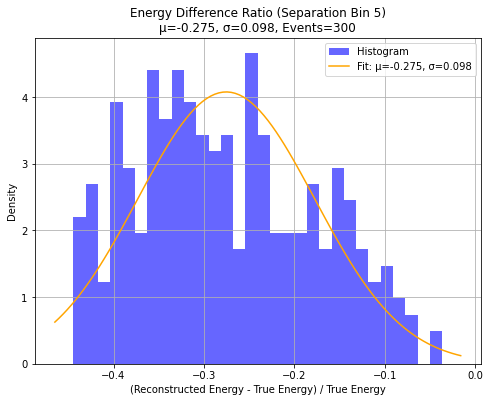

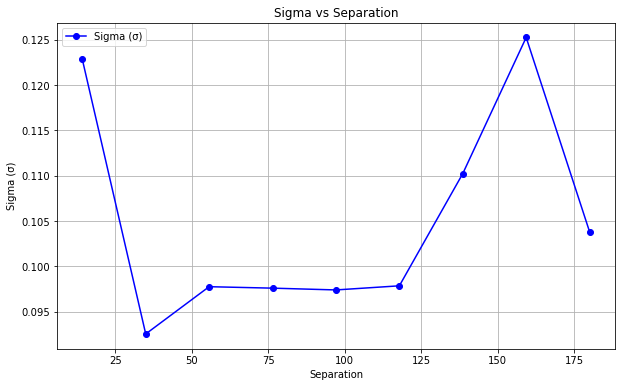

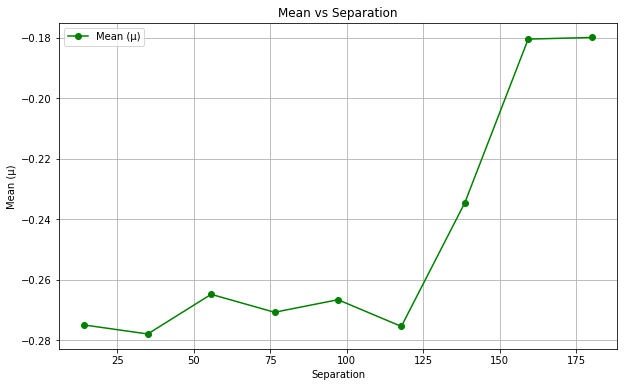

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_CERN[df_CERN['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


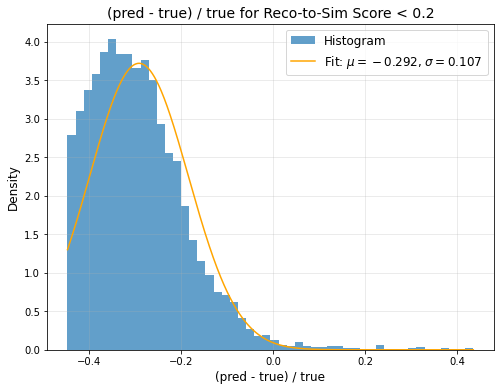

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_1503488/776054542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


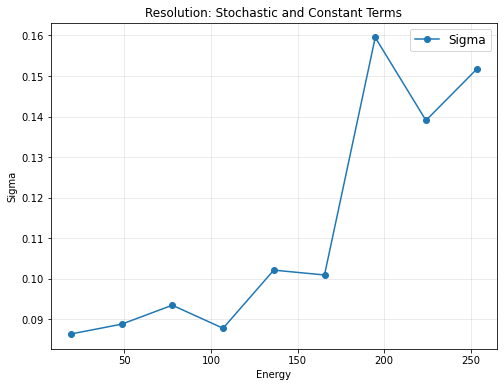

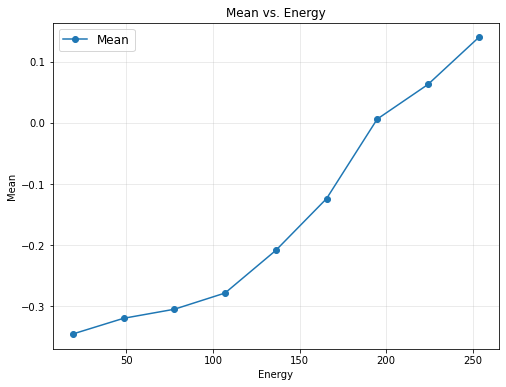

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

In [16]:
print()

In [15]:
from itertools import combinations
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)


# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for threshold in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by separation threshold
    valid_events = df_scores[df_scores['cp_separation'] <= threshold]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Extract event data
            event = data_test[event_idx]
            true_labels_event = event.assoc[:, 0]  # Ground truth cluster labels
            pred_trackster_labels = np.array(all_cluster_labels[event_idx])  # Predicted labels

            # Generate all possible pairs of tracksters
            trackster_pairs = list(combinations(range(len(true_labels_event)), 2))

            # Initialize sets
            P_V = set()  # Ground truth pairs
            P_U = set()  # Predicted pairs
            P_X = set(trackster_pairs)  # All pairs

            for i, j in trackster_pairs:
                if true_labels_event[i] == true_labels_event[j]:
                    P_V.add((i, j))  # Ground truth edge
                if pred_trackster_labels[i] == pred_trackster_labels[j]:
                    P_U.add((i, j))  # Predicted edge

            # Calculate Confusion Matrix
            TP = len(P_V & P_U)  # True Positive
            FN = len(P_V - P_U)  # False Negative
            FP = len(P_U - P_V)  # False Positive
            TN = len(P_X - (P_V | P_U))  # True Negative

            # Update global counts
            global_TP += TP
            global_FP += FP
            global_FN += FN
            global_TN += TN

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)
    
# Check conditions for removing the first point
if len(fpr_list) > 1 and len(tpr_list) > 1:
    if (fpr_list[1] > fpr_list[0]) or (tpr_list[1] <= tpr_list[0]):
        print("Removing the first point from fpr_list and tpr_list due to conditions.")
        fpr_list.pop(0)
        tpr_list.pop(0)
        




# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()


Error processing event 207: name 'data_test' is not defined
Error processing event 617: name 'data_test' is not defined
Error processing event 877: name 'data_test' is not defined
Error processing event 946: name 'data_test' is not defined
Error processing event 1001: name 'data_test' is not defined
Error processing event 1148: name 'data_test' is not defined
Error processing event 1300: name 'data_test' is not defined
Error processing event 1893: name 'data_test' is not defined
Error processing event 1945: name 'data_test' is not defined
Error processing event 2160: name 'data_test' is not defined
Error processing event 2166: name 'data_test' is not defined
Error processing event 2466: name 'data_test' is not defined
Error processing event 2671: name 'data_test' is not defined
Error processing event 2978: name 'data_test' is not defined
Error processing event 2986: name 'data_test' is not defined
Error processing event 3456: name 'data_test' is not defined
Error processing event 3495:

Error processing event 3308: name 'data_test' is not defined
Error processing event 3309: name 'data_test' is not defined
Error processing event 3310: name 'data_test' is not defined
Error processing event 3314: name 'data_test' is not defined
Error processing event 3315: name 'data_test' is not defined
Error processing event 3317: name 'data_test' is not defined
Error processing event 3318: name 'data_test' is not defined
Error processing event 3319: name 'data_test' is not defined
Error processing event 3320: name 'data_test' is not defined
Error processing event 3322: name 'data_test' is not defined
Error processing event 3329: name 'data_test' is not defined
Error processing event 3330: name 'data_test' is not defined
Error processing event 3332: name 'data_test' is not defined
Error processing event 3333: name 'data_test' is not defined
Error processing event 3334: name 'data_test' is not defined
Error processing event 3335: name 'data_test' is not defined
Error processing event 3

Error processing event 1871: name 'data_test' is not defined
Error processing event 1873: name 'data_test' is not defined
Error processing event 1878: name 'data_test' is not defined
Error processing event 1879: name 'data_test' is not defined
Error processing event 1880: name 'data_test' is not defined
Error processing event 1881: name 'data_test' is not defined
Error processing event 1882: name 'data_test' is not defined
Error processing event 1884: name 'data_test' is not defined
Error processing event 1885: name 'data_test' is not defined
Error processing event 1886: name 'data_test' is not defined
Error processing event 1887: name 'data_test' is not defined
Error processing event 1888: name 'data_test' is not defined
Error processing event 1889: name 'data_test' is not defined
Error processing event 1890: name 'data_test' is not defined
Error processing event 1892: name 'data_test' is not defined
Error processing event 1893: name 'data_test' is not defined
Error processing event 1

Error processing event 171: name 'data_test' is not defined
Error processing event 172: name 'data_test' is not defined
Error processing event 173: name 'data_test' is not defined
Error processing event 174: name 'data_test' is not defined
Error processing event 175: name 'data_test' is not defined
Error processing event 176: name 'data_test' is not defined
Error processing event 177: name 'data_test' is not defined
Error processing event 178: name 'data_test' is not defined
Error processing event 180: name 'data_test' is not defined
Error processing event 181: name 'data_test' is not defined
Error processing event 182: name 'data_test' is not defined
Error processing event 183: name 'data_test' is not defined
Error processing event 184: name 'data_test' is not defined
Error processing event 185: name 'data_test' is not defined
Error processing event 186: name 'data_test' is not defined
Error processing event 187: name 'data_test' is not defined
Error processing event 189: name 'data_t

Error processing event 1755: name 'data_test' is not defined
Error processing event 1756: name 'data_test' is not defined
Error processing event 1757: name 'data_test' is not defined
Error processing event 1758: name 'data_test' is not defined
Error processing event 1759: name 'data_test' is not defined
Error processing event 1760: name 'data_test' is not defined
Error processing event 1761: name 'data_test' is not defined
Error processing event 1762: name 'data_test' is not defined
Error processing event 1763: name 'data_test' is not defined
Error processing event 1765: name 'data_test' is not defined
Error processing event 1766: name 'data_test' is not defined
Error processing event 1767: name 'data_test' is not defined
Error processing event 1768: name 'data_test' is not defined
Error processing event 1769: name 'data_test' is not defined
Error processing event 1770: name 'data_test' is not defined
Error processing event 1771: name 'data_test' is not defined
Error processing event 1

Error processing event 3028: name 'data_test' is not defined
Error processing event 3030: name 'data_test' is not defined
Error processing event 3031: name 'data_test' is not defined
Error processing event 3032: name 'data_test' is not defined
Error processing event 3033: name 'data_test' is not defined
Error processing event 3034: name 'data_test' is not defined
Error processing event 3035: name 'data_test' is not defined
Error processing event 3036: name 'data_test' is not defined
Error processing event 3037: name 'data_test' is not defined
Error processing event 3038: name 'data_test' is not defined
Error processing event 3039: name 'data_test' is not defined
Error processing event 3040: name 'data_test' is not defined
Error processing event 3041: name 'data_test' is not defined
Error processing event 3042: name 'data_test' is not defined
Error processing event 3043: name 'data_test' is not defined
Error processing event 3044: name 'data_test' is not defined
Error processing event 3

Error processing event 0: name 'data_test' is not defined
Error processing event 1: name 'data_test' is not defined
Error processing event 2: name 'data_test' is not defined
Error processing event 3: name 'data_test' is not defined
Error processing event 4: name 'data_test' is not defined
Error processing event 5: name 'data_test' is not defined
Error processing event 6: name 'data_test' is not defined
Error processing event 7: name 'data_test' is not defined
Error processing event 8: name 'data_test' is not defined
Error processing event 9: name 'data_test' is not defined
Error processing event 10: name 'data_test' is not defined
Error processing event 11: name 'data_test' is not defined
Error processing event 12: name 'data_test' is not defined
Error processing event 13: name 'data_test' is not defined
Error processing event 14: name 'data_test' is not defined
Error processing event 15: name 'data_test' is not defined
Error processing event 16: name 'data_test' is not defined
Error p

Error processing event 1155: name 'data_test' is not defined
Error processing event 1156: name 'data_test' is not defined
Error processing event 1157: name 'data_test' is not defined
Error processing event 1158: name 'data_test' is not defined
Error processing event 1159: name 'data_test' is not defined
Error processing event 1160: name 'data_test' is not defined
Error processing event 1161: name 'data_test' is not defined
Error processing event 1162: name 'data_test' is not defined
Error processing event 1163: name 'data_test' is not defined
Error processing event 1164: name 'data_test' is not defined
Error processing event 1165: name 'data_test' is not defined
Error processing event 1166: name 'data_test' is not defined
Error processing event 1167: name 'data_test' is not defined
Error processing event 1168: name 'data_test' is not defined
Error processing event 1169: name 'data_test' is not defined
Error processing event 1170: name 'data_test' is not defined
Error processing event 1

Error processing event 1658: name 'data_test' is not defined
Error processing event 1659: name 'data_test' is not defined
Error processing event 1660: name 'data_test' is not defined
Error processing event 1661: name 'data_test' is not defined
Error processing event 1662: name 'data_test' is not defined
Error processing event 1663: name 'data_test' is not defined
Error processing event 1664: name 'data_test' is not defined
Error processing event 1665: name 'data_test' is not defined
Error processing event 1666: name 'data_test' is not defined
Error processing event 1667: name 'data_test' is not defined
Error processing event 1668: name 'data_test' is not defined
Error processing event 1669: name 'data_test' is not defined
Error processing event 1670: name 'data_test' is not defined
Error processing event 1671: name 'data_test' is not defined
Error processing event 1672: name 'data_test' is not defined
Error processing event 1673: name 'data_test' is not defined
Error processing event 1

Error processing event 2642: name 'data_test' is not defined
Error processing event 2643: name 'data_test' is not defined
Error processing event 2644: name 'data_test' is not defined
Error processing event 2645: name 'data_test' is not defined
Error processing event 2646: name 'data_test' is not defined
Error processing event 2647: name 'data_test' is not defined
Error processing event 2648: name 'data_test' is not defined
Error processing event 2649: name 'data_test' is not defined
Error processing event 2650: name 'data_test' is not defined
Error processing event 2651: name 'data_test' is not defined
Error processing event 2652: name 'data_test' is not defined
Error processing event 2653: name 'data_test' is not defined
Error processing event 2654: name 'data_test' is not defined
Error processing event 2655: name 'data_test' is not defined
Error processing event 2656: name 'data_test' is not defined
Error processing event 2657: name 'data_test' is not defined
Error processing event 2

Error processing event 0: name 'data_test' is not defined
Error processing event 1: name 'data_test' is not defined
Error processing event 2: name 'data_test' is not defined
Error processing event 3: name 'data_test' is not defined
Error processing event 4: name 'data_test' is not defined
Error processing event 5: name 'data_test' is not defined
Error processing event 6: name 'data_test' is not defined
Error processing event 7: name 'data_test' is not defined
Error processing event 8: name 'data_test' is not defined
Error processing event 9: name 'data_test' is not defined
Error processing event 10: name 'data_test' is not defined
Error processing event 11: name 'data_test' is not defined
Error processing event 12: name 'data_test' is not defined
Error processing event 13: name 'data_test' is not defined
Error processing event 14: name 'data_test' is not defined
Error processing event 15: name 'data_test' is not defined
Error processing event 16: name 'data_test' is not defined
Error p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
fpr_list.sort()
tpr_list.sort()

# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define separation thresholds (e.g., 0, 5, 10, ..., max separation in dataset)
separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)
score_threshold = 0.2  # Fixed threshold for both scores

# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for separation in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by cp_separation threshold
    valid_events = df_CERN[df_CERN['cp_separation'] <= separation]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Filter pairs for this event
            event_pairs = df_CERN[df_CERN['event_index'] == event_idx]
            
            # Extract scores
            sim_to_reco_scores = event_pairs['sim_to_reco_score'].values
            reco_to_sim_scores = event_pairs['reco_to_sim_score'].values

            # Loop through each pair
            for sim_score, reco_score in zip(sim_to_reco_scores, reco_to_sim_scores):
                if sim_score < score_threshold and reco_score < score_threshold:
                    global_TP += 1  # True Positive
                elif reco_score < score_threshold and sim_score > score_threshold:
                    global_FP += 1  # False Positive
                elif sim_score < score_threshold and reco_score > score_threshold:
                    global_FN += 1  # False Negative
                elif sim_score > score_threshold and reco_score > score_threshold:
                    global_TN += 1  # True Negative

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current separation threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)

# Pair FPR and TPR together
roc_points = list(zip(fpr_list, tpr_list))

# Sort by FPR in descending order
roc_points.sort(key=lambda x: x[0], reverse=True)

# Remove non-monotonic points
filtered_points = []
prev_fpr = float('inf')  # Start with a very large value for FPR

for fpr, tpr in roc_points:
    if fpr <= prev_fpr:
        filtered_points.append((fpr, tpr))
        prev_fpr = fpr

# Unzip into FPR and TPR lists
fpr_list, tpr_list = zip(*filtered_points)

# Convert back to lists
fpr_list = list(fpr_list)
tpr_list = list(tpr_list)

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)



# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Fixed Threshold (0.2) and Varying Separation')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(fpr_list)

In [ ]:
print(tpr_list)

In [ ]:

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)

In [ ]:
print(tpr_list)

# Test

In [80]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [81]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [82]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


Processing Events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1618.17it/s]


In [83]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0      0             0             0.0000             0.0000   
1            0      0             1             0.6800             0.5392   
2            0      1             0             0.5392             0.6800   
3            0      1             1             0.0000             0.0000   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0       30.0              30.0        1.05            1.0           0.000000  
1       30.0              70.0        1.05            1.0           1.333333  
2       70.0              30.0        2.05            1.0          -0.571429  
3       70.0              70.0        2.05            1.0           0.000000  


In [84]:
print('yay')

yay


# Check other data

In [85]:
import uproot

In [86]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [88]:
print(file.keys())

['ticlNtuplizer;1', 'ticlNtuplizer/tracksters;1', 'ticlNtuplizer/clusters;1', 'ticlNtuplizer/graph;1', 'ticlNtuplizer/candidates;1', 'ticlNtuplizer/trackstersMerged;1', 'ticlNtuplizer/associations;1', 'ticlNtuplizer/simtrackstersSC;1', 'ticlNtuplizer/simtrackstersCP;1', 'ticlNtuplizer/tracks;1']


In [89]:
track = file['ticlNtuplizer/tracksters;1']

In [90]:
print(track.keys())

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'layer_cluster_seed']


In [92]:
v_x = track['barycenter_x'].array()

In [97]:
print(len(v_x[0]))

31
